In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

31.60039049550211 135.00542383304787
-29.540220643615974 51.57510607927955
16.30653687647478 -161.9267030456287
58.913262482167994 24.15649804532876
-70.46785335411512 -73.79081470442664
7.7632408758812375 118.43265033575193
-11.09277945657692 105.99059715615886
-78.29637225457083 6.8154990834722184
77.33788112022822 54.860797287771504
87.58258405813314 -34.59221601356984
-86.92843993157896 70.29282945548184
-30.77739849209639 -162.8454418584633
-75.02752935407642 -123.12996387404874
57.171453215355314 127.24603020313418
-45.92859551803745 56.82683533362098
82.17175126170869 -103.54858712914661
-75.52215417765217 44.00217213556829
-36.76136297164354 46.90166073682536
7.424464820427957 -67.89367900081935
-77.06187768374832 -81.39151616661216
-52.30284976778727 -98.12643466808113
66.31349031243323 2.4123242873356787
4.118818928726498 94.90265808240713
55.07832600426033 145.44783087289005
-11.790439144529586 -28.81487162899353
-46.407593649470726 53.26225530648779
-87.96772600894043 154.7

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

639

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f352f62c454bb7c6c58eff33e7103f1f


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | muroto
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | nanakuli
Processing Record 4 of Set 1 | turba
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 7 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | tommot
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 17 of Set 1 | puerto carreno
Processing Record 18 of Set 1 | castro
Processing Re

Processing Record 40 of Set 4 | concordia
Processing Record 41 of Set 4 | carnarvon
Processing Record 42 of Set 4 | waterford
Processing Record 43 of Set 4 | norman wells
Processing Record 44 of Set 4 | guerrero negro
Processing Record 45 of Set 4 | uige
Processing Record 46 of Set 4 | prince rupert
Processing Record 47 of Set 4 | cape town
Processing Record 48 of Set 4 | mahibadhoo
Processing Record 49 of Set 4 | namibe
Processing Record 50 of Set 4 | marawi
Processing Record 1 of Set 5 | los llanos de aridane
Processing Record 2 of Set 5 | kavaratti
Processing Record 3 of Set 5 | paredon
Processing Record 4 of Set 5 | upernavik
Processing Record 5 of Set 5 | charo
Processing Record 6 of Set 5 | muncar
Processing Record 7 of Set 5 | sarai sidhu
Processing Record 8 of Set 5 | colonia
Processing Record 9 of Set 5 | broome
Processing Record 10 of Set 5 | mataura
Processing Record 11 of Set 5 | kupang
Processing Record 12 of Set 5 | ust-nera
Processing Record 13 of Set 5 | saurimo
Process

Processing Record 32 of Set 8 | talnakh
Processing Record 33 of Set 8 | todos santos
Processing Record 34 of Set 8 | troitsko-pechorsk
Processing Record 35 of Set 8 | guaymas
Processing Record 36 of Set 8 | campo verde
Processing Record 37 of Set 8 | wa
City not found. Skipping...
Processing Record 38 of Set 8 | evanston
Processing Record 39 of Set 8 | beira
Processing Record 40 of Set 8 | kovur
Processing Record 41 of Set 8 | lakes entrance
Processing Record 42 of Set 8 | graham
Processing Record 43 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 44 of Set 8 | kamarion
Processing Record 45 of Set 8 | porto empedocle
Processing Record 46 of Set 8 | alyangula
Processing Record 47 of Set 8 | barendrecht
Processing Record 48 of Set 8 | huarmey
Processing Record 49 of Set 8 | mandalgovi
Processing Record 50 of Set 8 | ambagarh chauki
Processing Record 1 of Set 9 | lebanon
Processing Record 2 of Set 9 | saquarema
Processing Record 3 of Set 9 | healdsburg
Processing Reco

Processing Record 21 of Set 12 | galiwinku
City not found. Skipping...
Processing Record 22 of Set 12 | trento
Processing Record 23 of Set 12 | sibu
Processing Record 24 of Set 12 | huilong
Processing Record 25 of Set 12 | balabac
Processing Record 26 of Set 12 | maine-soroa
Processing Record 27 of Set 12 | oranjemund
Processing Record 28 of Set 12 | jalu
Processing Record 29 of Set 12 | mbala
Processing Record 30 of Set 12 | hambantota
Processing Record 31 of Set 12 | tobane
Processing Record 32 of Set 12 | manicore
Processing Record 33 of Set 12 | nanchong
Processing Record 34 of Set 12 | gimli
Processing Record 35 of Set 12 | yagoua
Processing Record 36 of Set 12 | ketchikan
Processing Record 37 of Set 12 | romny
Processing Record 38 of Set 12 | morehead
Processing Record 39 of Set 12 | naftah
City not found. Skipping...
Processing Record 40 of Set 12 | nkongsamba
Processing Record 41 of Set 12 | cap malheureux
Processing Record 42 of Set 12 | fethiye
Processing Record 43 of Set 12 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Muroto,33.2833,134.1500,66.25,76,100,8.61,JP,2022-05-05 18:38:14
1,Nanakuli,21.3906,-158.1547,75.11,68,40,9.22,US,2022-05-05 18:38:15
2,Turba,59.0831,24.2250,55.04,44,0,6.91,EE,2022-05-05 18:38:15
3,Ushuaia,-54.8000,-68.3000,49.66,46,40,18.41,AR,2022-05-05 18:37:10
4,Hermanus,-34.4187,19.2345,59.81,92,15,6.71,ZA,2022-05-05 18:38:17
5,Avarua,-21.2078,-159.7750,75.25,94,100,3.44,CK,2022-05-05 18:38:18
6,Rikitea,-23.1203,-134.9692,78.26,84,41,15.08,PF,2022-05-05 18:38:19
7,Tommot,58.9564,126.2925,28.45,97,92,6.29,RU,2022-05-05 18:38:24
8,Yellowknife,62.4560,-114.3525,48.72,61,20,8.05,CA,2022-05-05 18:38:39
9,Port Alfred,-33.5906,26.8910,71.31,59,0,4.16,ZA,2022-05-05 18:38:39


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Muroto,JP,2022-05-05 18:38:14,33.2833,134.1500,66.25,76,100,8.61
1,Nanakuli,US,2022-05-05 18:38:15,21.3906,-158.1547,75.11,68,40,9.22
2,Turba,EE,2022-05-05 18:38:15,59.0831,24.2250,55.04,44,0,6.91
3,Ushuaia,AR,2022-05-05 18:37:10,-54.8000,-68.3000,49.66,46,40,18.41
4,Hermanus,ZA,2022-05-05 18:38:17,-34.4187,19.2345,59.81,92,15,6.71
5,Avarua,CK,2022-05-05 18:38:18,-21.2078,-159.7750,75.25,94,100,3.44
6,Rikitea,PF,2022-05-05 18:38:19,-23.1203,-134.9692,78.26,84,41,15.08
7,Tommot,RU,2022-05-05 18:38:24,58.9564,126.2925,28.45,97,92,6.29
8,Yellowknife,CA,2022-05-05 18:38:39,62.4560,-114.3525,48.72,61,20,8.05
9,Port Alfred,ZA,2022-05-05 18:38:39,-33.5906,26.8910,71.31,59,0,4.16


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

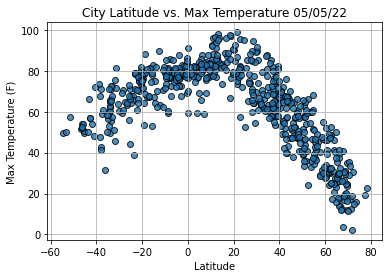

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

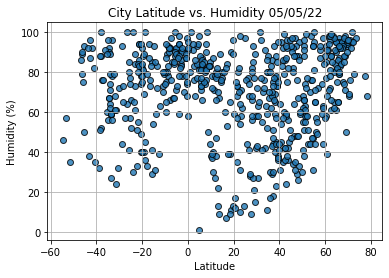

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

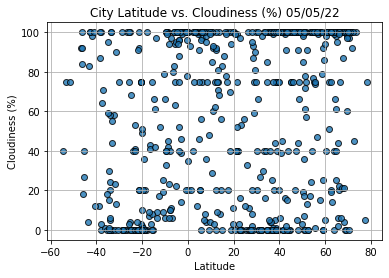

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

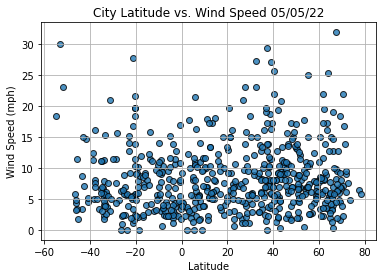

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()